## Objective

Airbnb is an online marketplace and hospitality service, enabling people to lease or rent short-term lodging including vacation rentals, apartment rentals, homestays, hostels beds, or hotel rooms. New users on Airbnb can book a place to stay in 34,000+ cities across 190+ countries. Analyzing the users behaviour will help to understand more about the users.

### Importing the data

In [0]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('ggplot')
sns.set(style="ticks", color_codes=True)
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_data = pd.read_csv("drive/My Drive/Colab Notebooks/airbnb-recruiting-new-user-bookings/train_users_2.csv")

### Summary of the data

In [0]:
train_data.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


There are 16 features used to describe each user in the dataset:

1.	user id
2.	the date of account creation
3.	timestamp of the first activity, note that it can be earlier than
4.	date of first booking
5.	gender
6.	age
7.	signup_method
8.	the page a user came to signup up from
9.	international language preference
10.	what kind of paid marketing
11.	where the marketing is e.g. google, craigslist, other
12.	whats the first marketing the user interacted with before the signing up
13.	signup_app
14.	first_device_type
15.	first_browser


In [0]:
train_data.shape

(213451, 16)

We have the data of 213k users

In [0]:
test_data = pd.read_csv("drive/My Drive/Colab Notebooks/airbnb-recruiting-new-user-bookings/test_users.csv")

In [0]:
test_data.shape

(62096, 15)

#### Missing Data

In [0]:
train_data.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [0]:
test_data.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

The training data consists of 213,451 rows x 16 columns while the test data has 62,096 rows x 15 columns with our target feature 'country_destination' being the additional column in the training set. We can immediately see that we have a substantial number of missing values for age.

In [0]:
train_data.age.describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

In [0]:
train_data[train_data.age > 100].age.describe()

count    2345.000000
mean      738.697655
std       897.655359
min       101.000000
25%       105.000000
50%       105.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

In [0]:
train_data[train_data.age < 18].age.describe()

count    158.000000
mean      12.202532
std        5.916359
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

The age data is a bit messy. There are are around 88k missing from the train_data. Around 2350 have the age above 100 while 158 have age below 14. So any age below 14 and above 100 are set to NaN.

In [0]:
train_data['age'] = np.where(np.logical_or(train_data.age.values < 14, train_data.age.values > 100), np.nan, train_data.age.values)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [0]:
train_data.age.describe()

count    123059.000000
mean         36.559211
std          11.690611
min          15.000000
25%          28.000000
50%          34.000000
75%          42.000000
max         100.000000
Name: age, dtype: float64

In [0]:
missing_age = train_data[train_data.age.isnull()].country_destination.value_counts()

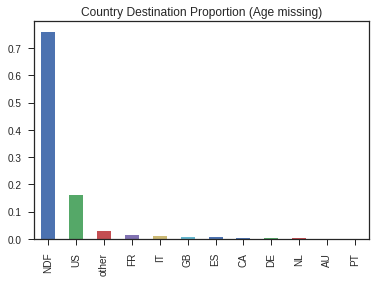

In [0]:
missing_age.div(missing_age.sum()).plot(kind='bar',title='Country Destination Proportion (Age missing)')

## Data Analysis

### Gender

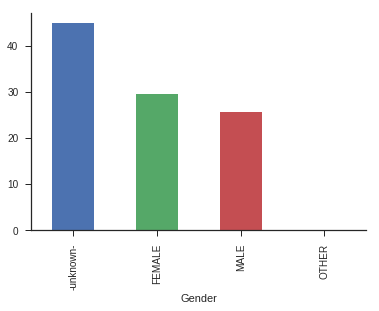

In [0]:
GenderTraffic = ((train_data.gender.value_counts() / train_data.shape[0]) * 100).plot(kind='bar')
plt.xlabel('Gender')
sns.despine()

As we've seen before at this plot we can see the amount of missing data in perspective. Also, notice that there is a slight difference between user gender.

### Age

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


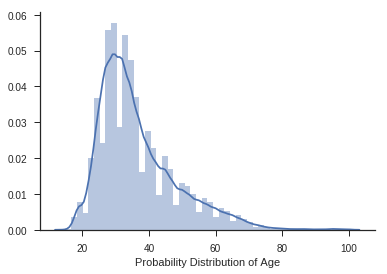

In [0]:
sns.distplot(train_data.age.dropna())
plt.xlabel('Probability Distribution of Age')
sns.despine()

As expected, most number of users are between the age of 25 and 40.

### Destination Country

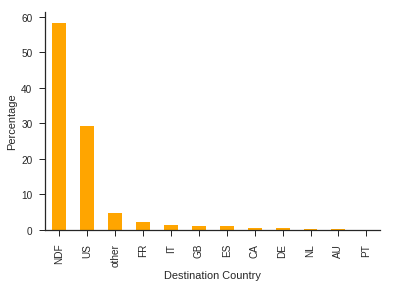

In [0]:
destination = ((train_data.country_destination.value_counts() / train_data.shape[0]) * 100).plot(kind='bar',color='Orange')
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

Higher percentage of users prefer to travel within the US.

### Platform

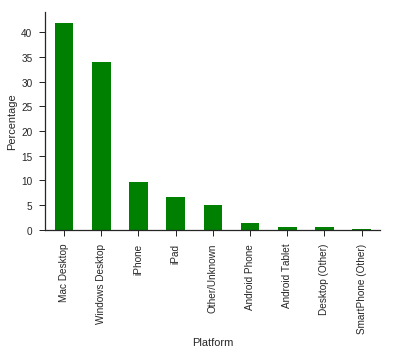

In [0]:
Platform = ((train_data.first_device_type.value_counts() / train_data.shape[0]) * 100).plot(kind="bar",color='Green')
plt.xlabel('Platform')
plt.ylabel('Percentage')
sns.despine()

Nearly 42% of users are Mac users while 34% are Windows Desktop users


###Signup Method

In [0]:
train_data.signup_method.value_counts()

basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64

Several users signup through Facebook. Airbnb can try to run more targeted campaigns on Facebook.

### First Browser

In [0]:
train_data.first_browser.value_counts()

Chrome                  63845
Safari                  45169
Firefox                 33655
-unknown-               27266
IE                      21068
Mobile Safari           19274
Chrome Mobile            1270
Android Browser           851
AOL Explorer              245
Opera                     188
Silk                      124
Chromium                   73
BlackBerry Browser         53
Maxthon                    46
Apple Mail                 36
IE Mobile                  36
Sogou Explorer             33
Mobile Firefox             30
SiteKiosk                  24
RockMelt                   24
Iron                       17
IceWeasel                  13
Pale Moon                  12
Yandex.Browser             11
SeaMonkey                  11
CometBird                  11
Camino                      9
TenFourFox                  8
wOSBrowser                  6
CoolNovo                    6
Opera Mini                  4
Avant Browser               4
Mozilla                     3
OmniWeb   

###Accounts created on a given time interval

Text(0, 0.5, 'Count created')

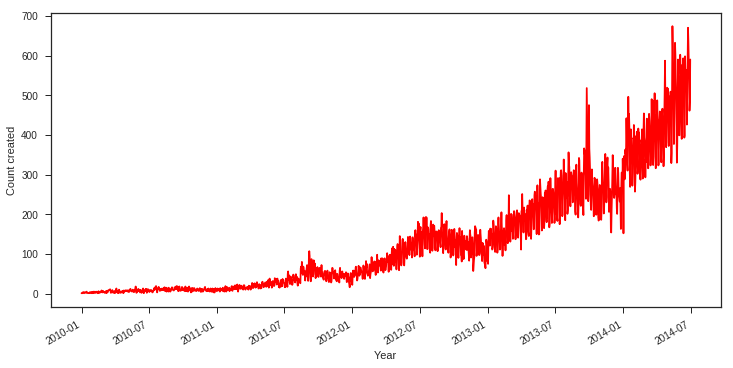

In [0]:
fig = plt.figure(figsize = (12, 6))
train_data.date_account_created = pd.to_datetime(train_data.date_account_created)
train_data.date_account_created.value_counts().plot('line', color = "Red")
plt.xlabel('Year')
plt.ylabel('Count created')

It's appreciable how fast Airbnb has grown over the last 4 years.

In [0]:
train_data.affiliate_provider.value_counts()

direct                 137426
google                  51693
other                   12549
craigslist               3471
bing                     2328
facebook                 2273
vast                      829
padmapper                 768
facebook-open-graph       545
yahoo                     496
gsp                       453
meetup                    347
email-marketing           166
naver                      52
baidu                      29
yandex                     17
wayn                        8
daum                        1
Name: affiliate_provider, dtype: int64